In [2]:
import cv2
import os
import numpy as np
import importlib
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from nuscenes.utils.geometry_utils import view_points
# importlib.reload(nuscenes.nuscenes)
import nuscenes.nuscenes as nuscenes_module
importlib.reload(nuscenes_module)

<module 'nuscenes.nuscenes' from '/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/nuscenes/nuscenes.py'>

In [3]:
nusc = NuScenes(version='v1.0-trainval', dataroot='./DataSets/nuScenes', verbose=True)

Loading NuScenes tables for version v1.0-trainval...
23 category,
8 attribute,
4 visibility,
64386 instance,
12 sensor,
10200 calibrated_sensor,
2631083 ego_pose,
68 log,
850 scene,
34149 sample,
2631083 sample_data,
1166187 sample_annotation,
4 map,
Done loading in 68.431 seconds.
Reverse indexing ...
Done reverse indexing in 62.1 seconds.


In [5]:
print(len(nusc.sample))


34149


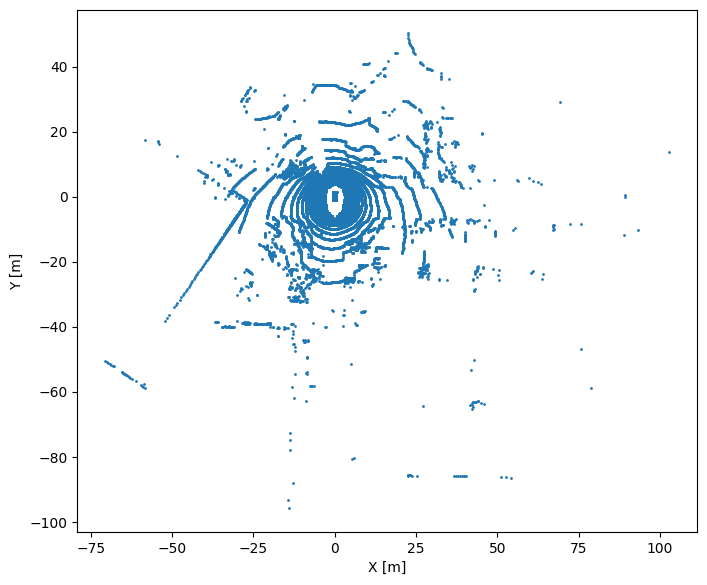

In [16]:
my_sample = nusc.sample[20417]

# 获取激光雷达数据
lidar_data = nusc.get('sample_data', my_sample['data']['LIDAR_TOP'])
lidar_path = f"{nusc.dataroot}/{lidar_data['filename']}"

if os.path.exists(lidar_path):
    pc = LidarPointCloud.from_file(lidar_path)

    # 投影到水平面以生成俯视图
    points = pc.points[0:3, :]  # 取x, y, z
    z_filter = points[2] < 1.0  # 可选的高度过滤
    points = points[:, z_filter]

    # 绘制俯视图
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(points[0], points[1], s=1)
    ax.set_aspect('equal')
    plt.xlabel('X [m]')
    plt.ylabel('Y [m]')
    plt.show()
else:
    print("file not exist:",lidar_path)

Adding ego poses to map...


100%|████████████████████████████████████████████████████████████████████████████████████████████████| 183/183 [00:04<00:00, 43.53it/s]


Creating plot...


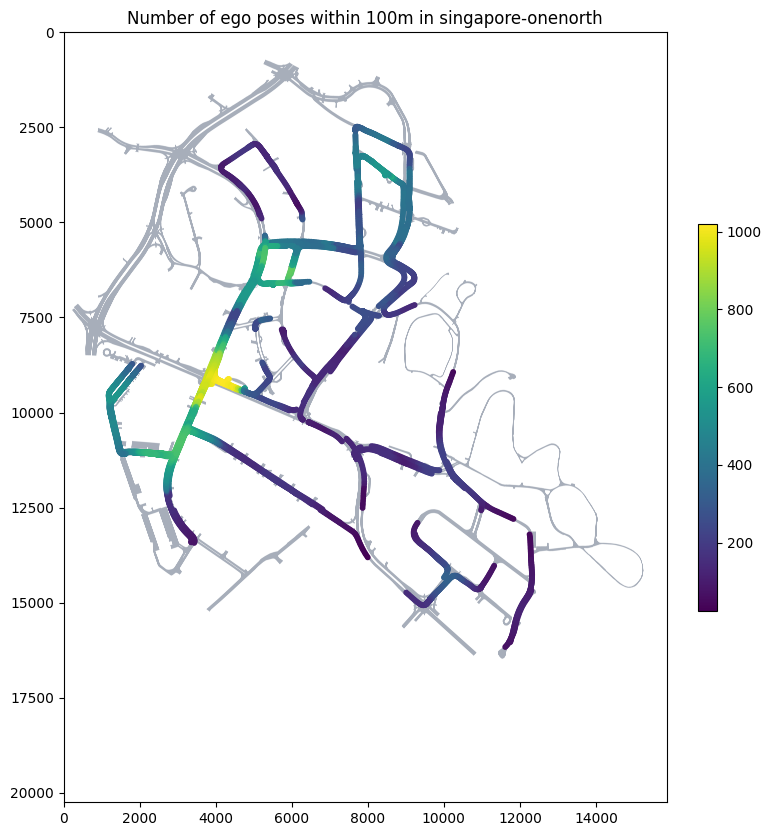

In [4]:
nusc.render_egoposes_on_map(log_location='singapore-onenorth')

In [17]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import LidarPointCloud
from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas



index_list = []  
with open('./sample-index.txt', 'r') as file:
    for line in file:
        index = int(line.strip())  # 去除可能的空白字符，并转换为整数
        index_list.append(index)

# 设置视频保存路径和视频编码格式
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
out = cv2.VideoWriter('point-cloud.mp4', fourcc, 5.0, (800, 800))  # 调整帧率和分辨率

for idx in index_list:
    # 获取点云数据
    my_sample = nusc.sample[idx]
    lidar_data = nusc.get('sample_data', my_sample['data']['LIDAR_TOP'])
    lidar_path = f"{nusc.dataroot}/{lidar_data['filename']}"
    pc = LidarPointCloud.from_file(lidar_path)
    points = pc.points[0:3, :]
    z_filter = points[2] < 1.0  # 过滤一些点以清晰显示
    points = points[:, z_filter]

    # 创建俯视图图像
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.scatter(points[0], points[1], s=1)
    ax.set_aspect('equal')
    ax.set_xlim([-50, 50])  # 可以调整以更好地控制显示范围
    ax.set_ylim([-50, 50])
    canvas = FigureCanvas(fig)
    canvas.draw()
    img = np.frombuffer(canvas.tostring_rgb(), dtype='uint8')
    img = img.reshape(fig.canvas.get_width_height()[::-1] + (3,))
    plt.close(fig)

    # 转换图像以适应视频尺寸
    img = cv2.resize(img, (800, 800))  # 确保和视频尺寸一致

    # 写入视频帧
    out.write(img)

# 释放资源
out.release()


In [18]:
print(len(nusc.scene))
nusc.scene


850


[{'token': '73030fb67d3c46cfb5e590168088ae39',
  'log_token': '6b6513e6c8384cec88775cae30b78c0e',
  'nbr_samples': 40,
  'first_sample_token': 'e93e98b63d3b40209056d129dc53ceee',
  'last_sample_token': '40e413c922184255a94f08d3c10037e0',
  'name': 'scene-0001',
  'description': 'Construction, maneuver between several trucks'},
 {'token': 'c3e0e9f6ee8d4170a3d22a6179f1ca3a',
  'log_token': '6b6513e6c8384cec88775cae30b78c0e',
  'nbr_samples': 40,
  'first_sample_token': '9e28820bd2ba4eb480e1b9079f17c30c',
  'last_sample_token': 'd0dc3c18dfc64c779bc9e4ee6e9e2e3b',
  'name': 'scene-0002',
  'description': 'Intersection, peds, waiting vehicle, parked motorcycle at parking lot'},
 {'token': 'e7ef871f77f44331aefdebc24ec034b7',
  'log_token': '92af2609d31445e5a71b2d895376fed6',
  'nbr_samples': 40,
  'first_sample_token': 'fd8420396768425eabec9bdddf7e64b6',
  'last_sample_token': '20684b77c01641e7a5ada48308a0b1e1',
  'name': 'scene-0003',
  'description': 'Parking lot, barrier, exit parking lot

In [20]:
nusc.sample

[{'token': 'e93e98b63d3b40209056d129dc53ceee',
  'timestamp': 1531883530449377,
  'prev': '',
  'next': '14d5adfe50bb4445bc3aa5fe607691a8',
  'scene_token': '73030fb67d3c46cfb5e590168088ae39',
  'data': {'RADAR_FRONT': 'bddd80ae33ec4e32b27fdb3c1160a30e',
   'RADAR_FRONT_LEFT': '1a08aec0958e42ebb37d26612a2cfc57',
   'RADAR_FRONT_RIGHT': '282fa8d7a3f34b68b56fb1e22e697668',
   'RADAR_BACK_LEFT': '05fc4678025246f3adf8e9b8a0a0b13b',
   'RADAR_BACK_RIGHT': '31b8099fb1c44c6381c3c71b335750bb',
   'LIDAR_TOP': '3388933b59444c5db71fade0bbfef470',
   'CAM_FRONT': '020d7b4f858147558106c504f7f31bef',
   'CAM_FRONT_RIGHT': '16d39ff22a8545b0a4ee3236a0fe1c20',
   'CAM_BACK_RIGHT': 'ec7096278e484c9ebe6894a2ad5682e9',
   'CAM_BACK': 'aab35aeccbda42de82b2ff5c278a0d48',
   'CAM_BACK_LEFT': '86e6806d626b4711a6d0f5015b090116',
   'CAM_FRONT_LEFT': '24332e9c554a406f880430f17771b608'},
  'anns': ['173a50411564442ab195e132472fde71',
   '5123ed5e450948ac8dc381772f2ae29a',
   'acce0b7220754600b700257a1de1573d',


In [5]:
index_list = []  
with open('./sample-index.txt', 'r') as file:
    for line in file:
        index = int(line.strip())  # 去除可能的空白字符，并转换为整数
        index_list.append(index)
scene_token_set = set()

for index in index_list:
    sample = nusc.sample[index]
    for scene in nusc.scene:
        if sample['token'] == scene['first_sample_token']:
            scene_token_set.add(scene['token'])  # 添加到集合中

# 将集合转换为列表
scene_token_list = list(scene_token_set)
scene_token_list

['2eb0dd074d8e4a328fd2283184c4412e',
 '3ada261efee347cba2e7557794f1aec8',
 '788c5502523f4d01b3a8de47ec3dadfb',
 '66134aebdaca4aca82aec91ec8c6245e',
 '406a61a4d394432e95a7e8426a97551f',
 '30a1a4ccd60047b4a22ee3bf0645f3ad',
 '43d5f10c855048b9963c9eb288a8a001',
 '44c9089913db4d4ab839a2fcb35989ed',
 '991d65cab952449a821deb32e971ff19',
 'f5b29a1e09d04355adcd60ab72de006b',
 'b789de07180846cc972118ee6d1fb027',
 'cddd0d5be10b4313a859524952455f43',
 'f0f120e4d4b0441da90ec53b16ee169d',
 '73b16c26a0d24c7a841e4cbe5d0d7878',
 '4772f5283211444eaabd463cd341d360',
 'c4ab236557c8423caa8add5fb48a0898',
 '66461d94f2e44d39a90843ff2dce11e8',
 '58af378ff68b49c99aabf320dca1ee25',
 'bebf5f5b2a674631ab5c88fd1aa9e87a',
 'e02aee6f1fec4d13ad77044466da5fb4',
 'dbd9183e1278475ea54761297e004b04',
 '54f56f80350b4c07af598ee87cf3886a',
 '643ee37539844cb2b0453fd031a3afdd',
 '5301151d8b6a42b0b252e95634bd3995',
 'a59b6db922ff490da5ccfc9980700935',
 '673ce9bdd9254fff82a524653a07b57f',
 'e329b73341204af7a9de29e65291ce1c',
 

In [12]:

token_list = nusc.sample[20410]['scene_token']
token_list

'bebf5f5b2a674631ab5c88fd1aa9e87a'

In [6]:
list_tk = []
for index, token in enumerate(scene_token_list):
    list_tk.append(token)
    nusc.render_egoposes_on_map(log_location='boston-seaport',scene_tokens=list_tk,out_path=f"./vue-app/public/assets/map-image/map-{index}.png")

------------hhhhhh-------------------
log tokens ['7a0fde44c3504eaeb18f9ad83bed65bc', '53cf9c55dd8644bea67b9f009fc1ee38', 'b05f285d53744542a3413476d6dd9270', 'ab1e1b004548466f86b31f879a2d9e50', '3313a6a85b264e4c86ee44d6e6329cf3', '08ba46dd716d42a69d108638fef5bbb9', 'cb3e914a6f0b4deea0efc8521ca1e671', '6434493562e64d9aa36774bf8d98870e', '169c1773af08486c80ed3e9540528290', '6f7fe59adf984e55a82571ab4f17e4e2', '485a0831e0964529b0b45d476139c68b', 'efa31cf3cd2f452789ca7f3e7541ea69', 'b2685a235700404581dc7354dd5b4eda', '69271ec7af1f446ca16820ac46d2047a', '20db5722b62c4c17bbff2d7b265a3c51', '6577357788b24c35a3b0419c138f50db', 'ca6d14b008ed4e0bb6b1eaaedadbd6c1', '6c12081a828548b6b0a36f12d53be6ca', '881dd2f8aaec49b681eb54be5bf3b3e2', '0d68b81100a640129a185cca5aa1edd7', '84ff0dbb8d7343ab95e776c4955d5884', '8e0ced20b9d847608afcfbc23056460e', '01ebe4444f624b4699ec6bf58837b153', '8aa38e0d963f48ba84708bc8eb1a07c2', '4de1fda752ae4cf8b650a5245734eb4c', '3a43824b84534c98bda1d07548db5817', 'bd38be48fba14

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:04<00:00,  4.26s/it]


Creating plot...
------------hhhhhh-------------------
log tokens ['7a0fde44c3504eaeb18f9ad83bed65bc', '53cf9c55dd8644bea67b9f009fc1ee38', 'b05f285d53744542a3413476d6dd9270', 'ab1e1b004548466f86b31f879a2d9e50', '3313a6a85b264e4c86ee44d6e6329cf3', '08ba46dd716d42a69d108638fef5bbb9', 'cb3e914a6f0b4deea0efc8521ca1e671', '6434493562e64d9aa36774bf8d98870e', '169c1773af08486c80ed3e9540528290', '6f7fe59adf984e55a82571ab4f17e4e2', '485a0831e0964529b0b45d476139c68b', 'efa31cf3cd2f452789ca7f3e7541ea69', 'b2685a235700404581dc7354dd5b4eda', '69271ec7af1f446ca16820ac46d2047a', '20db5722b62c4c17bbff2d7b265a3c51', '6577357788b24c35a3b0419c138f50db', 'ca6d14b008ed4e0bb6b1eaaedadbd6c1', '6c12081a828548b6b0a36f12d53be6ca', '881dd2f8aaec49b681eb54be5bf3b3e2', '0d68b81100a640129a185cca5aa1edd7', '84ff0dbb8d7343ab95e776c4955d5884', '8e0ced20b9d847608afcfbc23056460e', '01ebe4444f624b4699ec6bf58837b153', '8aa38e0d963f48ba84708bc8eb1a07c2', '4de1fda752ae4cf8b650a5245734eb4c', '3a43824b84534c98bda1d07548db5817

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 2/2 [00:00<00:00, 40.35it/s]

Creating plot...


------------hhhhhh-------------------
log tokens ['7a0fde44c3504eaeb18f9ad83bed65bc', '53cf9c55dd8644bea67b9f009fc1ee38', 'b05f285d53744542a3413476d6dd9270', 'ab1e1b004548466f86b31f879a2d9e50', '3313a6a85b264e4c86ee44d6e6329cf3', '08ba46dd716d42a69d108638fef5bbb9', 'cb3e914a6f0b4deea0efc8521ca1e671', '6434493562e64d9aa36774bf8d98870e', '169c1773af08486c80ed3e9540528290', '6f7fe59adf984e55a82571ab4f17e4e2', '485a0831e0964529b0b45d476139c68b', 'efa31cf3cd2f452789ca7f3e7541ea69', 'b2685a235700404581dc7354dd5b4eda', '69271ec7af1f446ca16820ac46d2047a', '20db5722b62c4c17bbff2d7b265a3c51', '6577357788b24c35a3b0419c138f50db', 'ca6d14b008ed4e0bb6b1eaaedadbd6c1', '6c12081a828548b6b0a36f12d53be6ca', '881dd2f8aaec49b681eb54be5bf3b3e2', '0d68b81100a640129a185cca5aa1edd7', '84ff0dbb8d7343ab95e776c4955d5884', '8e0ced20b9d847608afcfbc23056460e', '01ebe4444f624b4699ec6bf58837b153', '8aa38e0d963f48ba84708bc8eb1a07c2', '4de1fda752ae4cf8b650a5245734eb4c', '3a43824b84534c98bda1d07548db5817', 'bd38be48fba14

100%|████████████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 56.18it/s]

Creating plot...


: 